*  **AUTHOR : SANALA MANOJKUMAR**
*  **PROGRAM : GRADUATE ROTATIONAL INTERNSHIP PROGRAM**
* **MONTH : GRIP MARCH 2021**
*  **ORGANIZATION : THE SPARKS FOUNDATION**

# **TASK - 1 : PREDICTION USING SUPERVISED ML**

In [ ]:
## import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
## import and read the data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
## describe the data
print('Describe the data ')
data.describe()

Describe the data 


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
## check data types in the data
data1=data.dtypes
print("types of the data")
data1

types of the data


Hours     float64
Scores      int64
dtype: object

In [ ]:
## check data info
data2=data.info()     
data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
## find missing values 
data.isnull==True    ## isnull() command is help to find the missing values

False

There is no null or no missing values in the dataset

# **Data visualization**

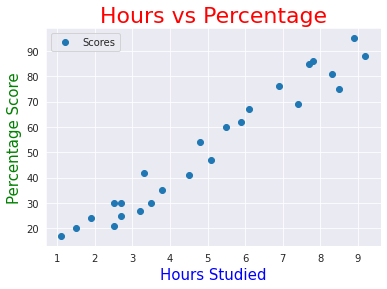

In [ ]:
## visulazation of the data
## Plotting the distribution of scores
sns.set_style('darkgrid')
data.plot(x='Hours', y='Scores', style='o')


## Add labels & titles
plt.title('Hours vs Percentage',color="red", size=22)
plt.xlabel('Hours Studied', color="blue",size=15 )  
plt.ylabel('Percentage Score', color="green",size=15)  

## Display the plot
plt.legend()
plt.show()

######above graph we can clearly see that there is a positive linear relation between the number of x and y axis.

# **DATA VISULIZATION**

In [ ]:
## create the regression  
x = data['Hours']
y = data['Scores']

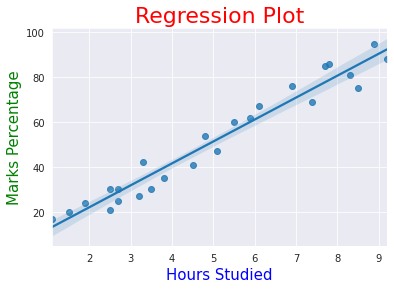

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
## visulazation of correlation data
sns.regplot(x=data['Hours'], y=data ['Scores'])
plt.title('Regression Plot',color='red',size=22)
plt.ylabel('Marks Percentage',color='green', size=15)
plt.xlabel('Hours Studied',color='blue', size=15)
plt.show()
print(data.corr())

above plot variables are correlated positively.


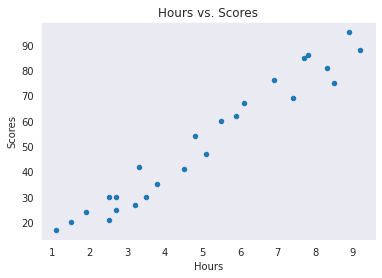

In [ ]:
## scatter plot of Data
data.plot.scatter(x="Hours",y="Scores")
plt.title("Hours vs. Scores")
plt.grid()
plt.show()

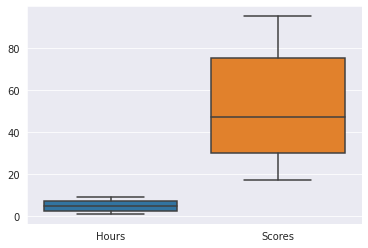

In [ ]:
## box plot of Data
sns.boxplot(data=data[["Hours","Scores",]])

### **MODEL BUILDING**

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

**Split the Data into Training and Testing**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

**Training algorithm**

 **Linear Regression**

 Linear regression is a statistical method for modelling relationship between a dependent variable with a given set of independent variables. dependent variables as response and independent variables as features for simplicity.


In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print('Trainig Complete')

Trainig Complete


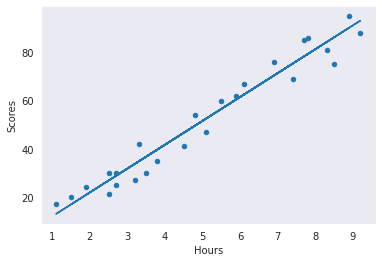

In [ ]:
## plot the Regression line
line = lr.coef_*x+lr.intercept_

data.plot.scatter(x="Hours",y="Scores")
plt.plot(x, line);
plt.grid()
plt.show()

In [ ]:
print('Train Score')
print(lr.score(x_train,y_train))

Train Score
0.9515510725211553


In [ ]:
print('Test Score')
print(lr.score(x_test,y_test))

Test Score
0.9454906892105354


In [ ]:
y_pred=lr.predict(x_test)

**Compare Actual vs Predicted**

In [ ]:
print(x_test) # Testing data - In Hours
y_pred = lr.predict(x_test) # Predicting the scores
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Marks': [k for k in y_pred]})
prediction

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


**The predicted score if a student studies for 9.25 hrs/ day.**

In [ ]:
hours = np.array([[9.25]])
pred_value = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(pred_value[0],4)))

No of Hours = [[9.25]]
Predicted Score = 93.6917


### **EVALUATING THE MODEL**

In [ ]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


In [ ]:
## R2 SQUARE
metrics.r2_score(y_test, y_pred)

0.9454906892105354